# Гарапко Даниил, группа 858641

# Лабораторная работа №3 “Переобучение и регуляризация”

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy import optimize
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

## Task 1

Набор данных ex3data1.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит две переменные X (изменения
уровня воды) и y (объем воды, вытекающий из дамбы). По переменной X
необходимо предсказать y. Данные разделены на три выборки: обучающая
выборка (X, y), по которой определяются параметры модели; валидационная
выборка (X<sub>val</sub>, y<sub>val</sub>), на которой настраивается коэффициент регуляризации;
контрольная выборка (X<sub>test</sub>, y<sub>test</sub>), на которой оценивается качество
построенной модели.

1. Загрузите данные ex3data1.mat из файла.

In [0]:
task3_file_name = "Data\Lab 3\ex3data1.mat"
mat = loadmat(task3_file_name)  # load mat-file
X = mat['X']
Xtest = mat['Xtest']
Xval = mat['Xval']
y = mat['y']
ytest = mat['ytest']
yval = mat['yval']

2. Постройте график, где по осям откладываются X и y из обучающей
выборки.

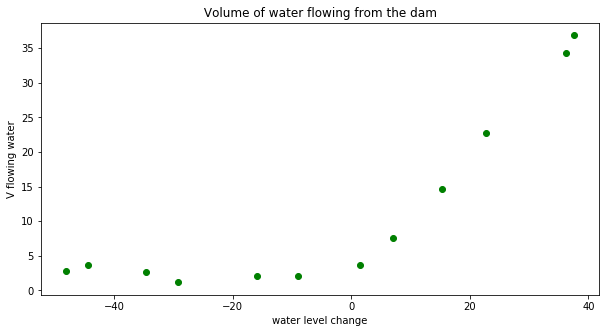

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color='green')
# ax.scatter(Xtest, ytest, color='blue')
# ax.scatter(Xval, yval, color='red')
ax.set(xlabel='water level change', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()

3. Реализуйте функцию стоимости потерь для линейной регрессии с
L2-регуляризацией.

In [0]:
lost_func = lambda t, x, y, l: (1 / (2*len(y))) * (np.sum(np.square(np.dot(t.T, x).T - y).T) + l*np.sum(np.square(t)))

4. Реализуйте функцию градиентного спуска для линейной регрессии с
L2-регуляризацией.

In [0]:
def update_func(t, x, y, l):
    m = len(y)
    temp = np.dot(t.T, x).T - y
    temp = alpha * (np.dot(temp.T, x.T).T / m + t * l / m)
    temp[0] = temp[0] - t[0] * alpha * l / m
    return t - temp

In [0]:
def optimize_by_gradient_descent(t, x, y, koeff_regularization=0, is_print=True):
    costs = []
    delta = -1
    step = 1
    for i in range(50000):
        temp = update_func(t, x, y, koeff_regularization)
        cost = lost_func(temp, x, y, koeff_regularization).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        step += 1
        if delta > 0:
            break
        t = temp
    if is_print:
        plt.plot(np.array([range(1, step)]).T, costs)
        plt.show()
    return t

5. Постройте модель линейной регрессии с коэффициентом
регуляризации 0 и постройте график полученной функции совместно с
графиком из пункта 2. Почему регуляризация в данном случае не
сработает?

Регуляризация не сработает, потому что регуляризационная добавка будет равна 0.

In [0]:
alpha = 0.001
n = X.shape[1]+1 #po x 
m = X.shape[0] #po y 
x = np.hstack((np.ones((m,1)), X))
x = x.T

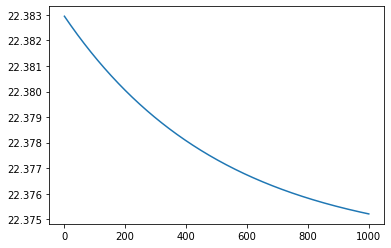

array([[13.03608465],
       [ 0.36746845]])

In [0]:
theta = optimize_by_gradient_descent(np.array([[12.9512123],[0.36694668]]), x, y)
theta

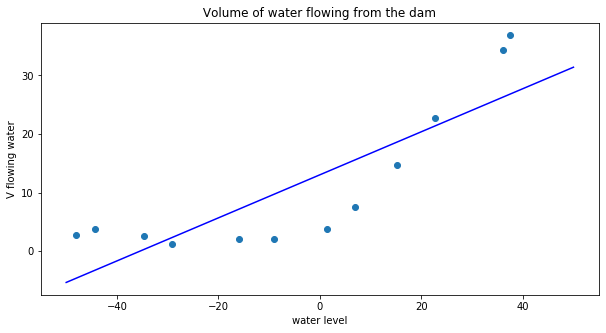

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
xo = np.linspace(-50, 50, 100)
yo = theta[0]+theta[1]*xo
plt.plot(xo, yo, 'b', color='blue')
plt.show()

6. Постройте график процесса обучения (learning curves) для обучающей
и валидационной выборки. По оси абсцисс откладывается число
элементов из обучающей выборки, а по оси ординат - ошибка (значение
функции потерь) для обучающей выборки (первая кривая) и
валидационной выборки (вторая кривая). Какой вывод можно сделать
по построенному графику?

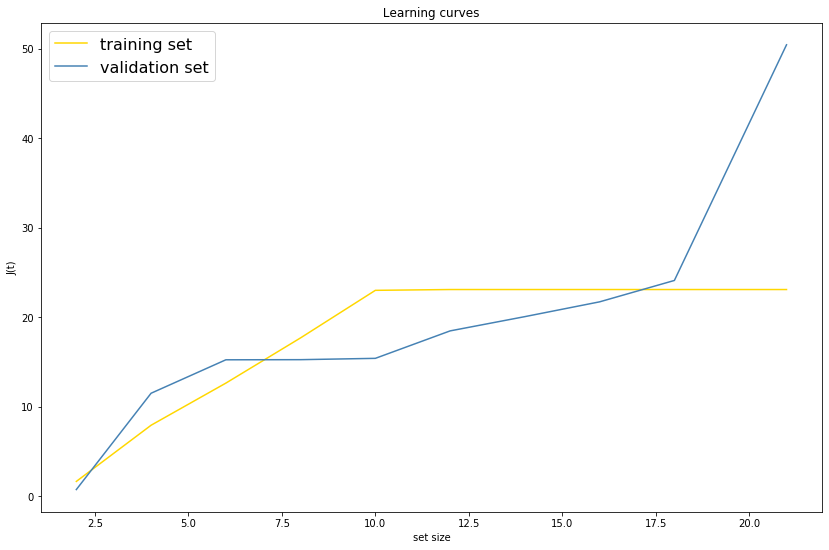

In [0]:
train_score = []
valid_score = []

X_train= x
y_train= y

X_valid_temp=np.hstack((np.ones((Xval.shape[0],1)), Xval))
X_valid_temp=X_valid_temp.T

# create ten incremental training set sizes
training_set_sizes = np.linspace(2, X_valid_temp.shape[1], 10, dtype='int')
for i in training_set_sizes:
    theta_train = optimize_by_gradient_descent(theta, X_train[:,:i+1], y_train[:i+1,:], 0.1, False)
    train_score.append(lost_func(theta_train, X_train[:,:i+1], y_train[:i+1,:], 0.1))
    
    theta_valid = optimize_by_gradient_descent(theta, X_valid_temp[:,:i+1], yval[:i+1,:], 0.1, False)
    valid_score.append(lost_func(theta_valid, X_valid_temp[:,:i+1], yval[:i+1,:], 0.1))
    
# plot learning curves
fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(training_set_sizes, train_score, c='gold')
ax.plot(training_set_sizes, valid_score, c='steelblue')
ax.legend(['training set', 'validation set'], fontsize=16)
ax.set(xlabel='set size', ylabel='J(t)', title=' Learning curves ')
plt.show()

7. Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X<sup>2</sup>, X<sup>3</sup>, X<sup>4</sup>, …, X<sup>p</sup>).

In [0]:
def add_polynom_properties(x, p=0):
    for i in range(2,p+1):
        x=np.hstack((x, x[:,0].reshape((x.shape[0],1))**i))
    return x

8. Поскольку в данной задаче будет использован полином высокой
степени, то необходимо перед обучением произвести нормализацию
признаков

In [0]:
def normalize(data):
    min_value = np.min(data, axis=0)
    max_value = np.max(data, axis=0)
    average = np.average(data, axis=0)
    range_values = max_value - min_value
    return (data - average) / range_values, range_values, average

def denormalize_theta(t, range_values, average):
    t_denormalized = np.empty(shape=t.shape)
    t_denormalized[0,0]=t[0, 0]-(t[1:,0] * average / range_values).sum() #free member
    t_denormalized[1:,:]=np.divide(theta_normal[1:,:].T,np.array(range_values_X.T)).T
    return t_denormalized

9. Обучите модель с коэффициентом регуляризации 0 и p = 8

In [0]:
alpha = 0.01
p=8
n = p+1
m = X.shape[0] #po y 
x = add_polynom_properties(X, 8)

normalized_data_X, range_values_X, average_X = normalize(x)

x = np.hstack((np.ones((m,1)), normalized_data_X)).T

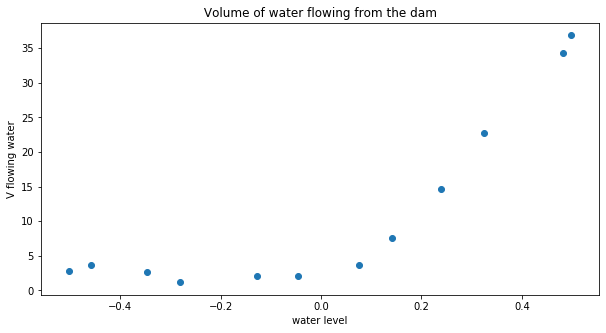

In [0]:
x0, _, _ = normalize(X)
normalized_data_Y, range_values_Y, average_Y = normalize(y)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x0, y)
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()

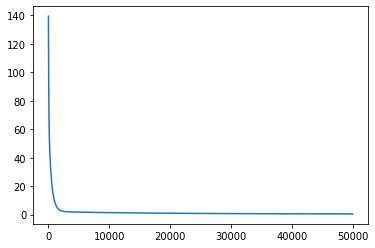

array([[ 5.02940735e+00],
       [ 4.19548707e-01],
       [ 1.09504427e-02],
       [ 2.68813569e-05],
       [ 3.73531365e-07],
       [-3.54056954e-09],
       [-2.36236017e-10],
       [-2.82914379e-13],
       [-1.56979716e-13]])

In [0]:
theta_normal = optimize_by_gradient_descent(np.zeros((n, 1)), x, y)
theta = denormalize_theta(theta_normal, range_values_X, average_X)
theta

10.Постройте график модели, совмещенный с обучающей выборкой, а также график процесса обучения. Какой вывод можно сделать в данном случае?

Полиномиальная регрессия практически точно описывает поведение данных.

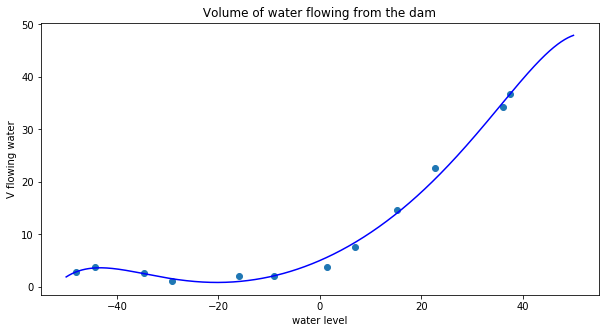

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)
xo = np.linspace(-50, 50, 1000).reshape(1000,1)
x_temp = add_polynom_properties(xo, 8)
x_temp = np.hstack((np.ones((1000,1)), x_temp)).T
yo = np.dot(theta.T, x_temp).T
plt.plot(xo, yo, 'b', color='blue')
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()

11.Постройте графики из пункта 10 для моделей с коэффициентами
регуляризации 1 и 100. Какие выводы можно сделать?

$$
\lambda = 1.0
$$

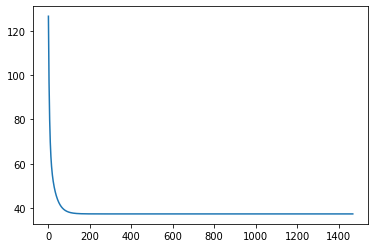

array([[9.07814052e+00],
       [1.72313553e-01],
       [3.34667806e-03],
       [5.17605814e-05],
       [8.28426773e-07],
       [1.64328693e-08],
       [1.92068436e-10],
       [5.20306635e-12],
       [3.98587031e-14]])

In [0]:
theta_normal = optimize_by_gradient_descent(np.zeros((n, 1)), x, y, 1.0)
theta = denormalize_theta(theta_normal, range_values_X, average_X)
theta

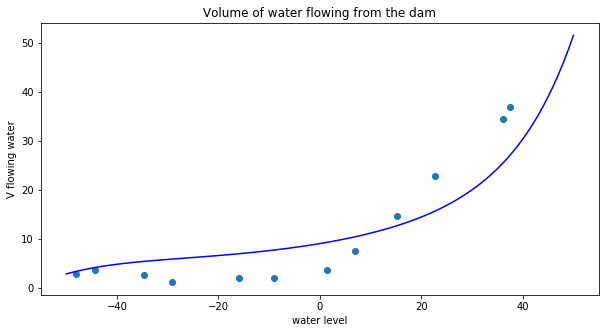

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)
xo = np.linspace(-50, 50, 100).reshape(100,1)
x_temp = add_polynom_properties(xo, 8)
x_temp = np.hstack((np.ones((100,1)), x_temp)).T
yo = np.dot(theta.T, x_temp).T
plt.plot(xo, yo, 'b', color='blue')
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()

$$
\lambda = 100.0
$$

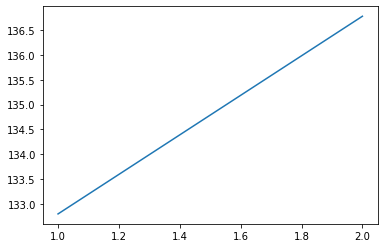

array([[1.18877269e+00],
       [1.72312484e-01],
       [3.34664245e-03],
       [5.17610969e-05],
       [8.28435975e-07],
       [1.64331074e-08],
       [1.92073781e-10],
       [5.20312416e-12],
       [3.98610344e-14]])

In [0]:
theta = optimize_by_gradient_descent(np.zeros((n, 1)), x, y, 100.0)
theta = denormalize_theta(theta, range_values_X, average_X)
theta

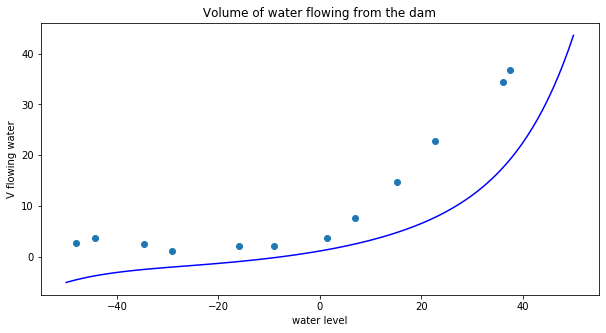

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)
xo = np.linspace(-50, 50, 100).reshape(100,1)
x_temp = add_polynom_properties(xo, 8)
x_temp = np.hstack((np.ones((100,1)), x_temp)).T
yo = np.dot(theta.T, x_temp).T
plt.plot(xo, yo, 'b', color='blue')
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()

12.С помощью валидационной выборки подберите коэффиент
регуляризации, который позволяет достичь наименьшей ошибки.
Процесс подбора отразите с помощью графика (графиков).

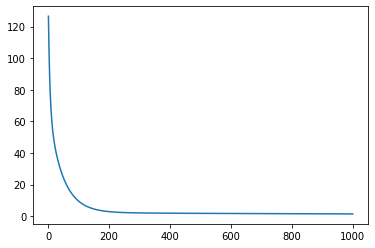

array([[5.80118746e+00],
       [3.30342525e-01],
       [7.48029852e-03],
       [6.70638964e-05],
       [1.37963898e-06],
       [1.75467885e-08],
       [2.57467139e-10],
       [5.62036581e-12],
       [3.28044598e-14]])

In [0]:
theta_normal = optimize_by_gradient_descent(np.zeros((n, 1)), x, y)
theta = denormalize_theta(theta_normal, range_values_X, average_X)
theta

In [0]:
alpha = 0.1
p=8
m = Xval.shape[0] 

xval = add_polynom_properties(Xval, p)
xval = (xval - average_X) / range_values_X
xval = np.hstack((np.ones((m,1)), xval)).T
min_value, min_lmbda = 1e10, -1
theta_val = theta_normal
lost_history = []
for lmbda in np.arange(-0.1, 2.1, 0.1):
#     print(lmbda)
    theta_value = optimize_by_gradient_descent(theta_val, xval, yval, lmbda.item(), False)
    value = lost_func(theta_value, xval, yval, lmbda.item())
    lost_history.append(value)
    if abs(value) < min_value:
        min_value, min_lmbda = value, lmbda

In [0]:
min_value, min_lmbda

(-0.04106630715813659, -0.1)

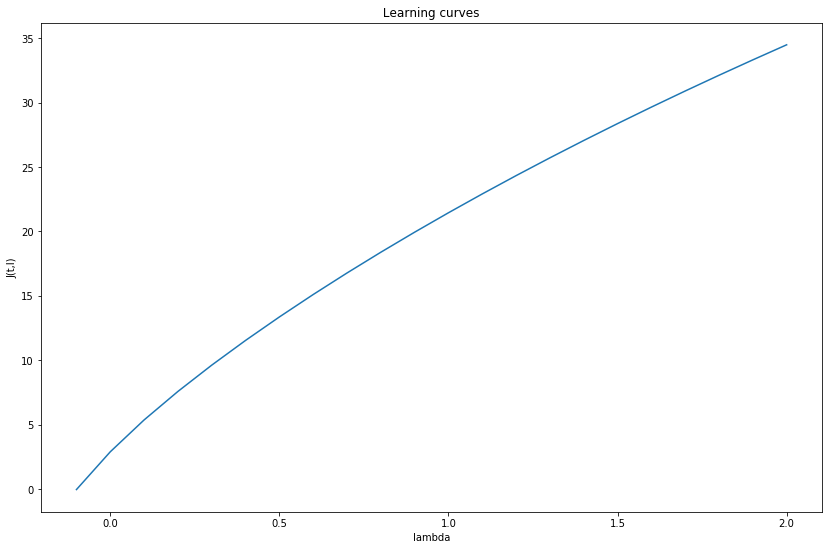

In [0]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(np.arange(-0.1, 2.1, 0.1), lost_history)
ax.set(xlabel='lambda', ylabel='J(t,l)', title=' Learning curves ')
plt.show()

13.Вычислите ошибку (потерю) на контрольной выборке.

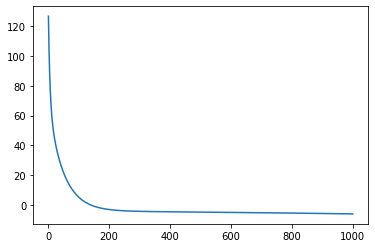

array([[ 5.03378513e+00],
       [ 3.78096274e-01],
       [ 8.82110563e-03],
       [ 6.13938643e-05],
       [ 1.34496969e-06],
       [ 1.38164335e-08],
       [ 1.87267870e-10],
       [ 4.72861133e-12],
       [-5.03358736e-15]])

In [0]:
theta_normal = optimize_by_gradient_descent(np.zeros((n, 1)), x, y, -0.1)
theta = denormalize_theta(theta_normal, range_values_X, average_X)
theta

In [0]:
xtest = add_polynom_properties(Xtest, 8)
xtest = (xtest - average_X) / range_values_X
xtest = np.hstack((np.ones((Xtest.shape[0],1)), xtest)).T
lost_func(theta_normal, xtest, ytest, -0.1)

0.5430255211600542

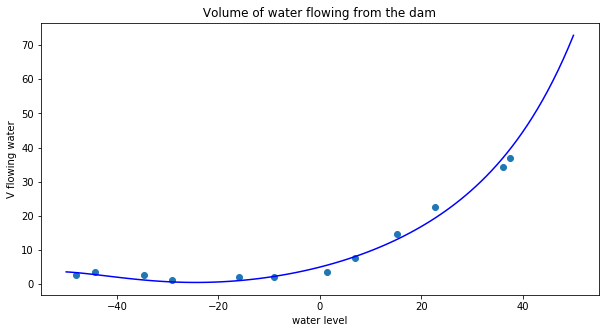

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)
xo = np.linspace(-50, 50, 100).reshape(100,1)
x_temp = add_polynom_properties(xo, 8)
x_temp = np.hstack((np.ones((100,1)), x_temp)).T
yo = np.dot(theta.T, x_temp).T
plt.plot(xo, yo, 'b', color='blue')
ax.set(xlabel='water level', ylabel='V flowing water', title=' Volume of water flowing from the dam ')
plt.show()